In [1]:
import os
import sys
import json

sys.path.append(os.path.abspath(os.pardir))

import pandas as pd
from sklearn.metrics import f1_score, accuracy_score
%matplotlib inline

from tdparse.parsers import semeval_14, semeval_15_16, dong, election
from tdparse.data_types import TargetCollection
from tdparse.helper import read_config, full_path

In [2]:
def extract_columns(model_result_fp, columns):
    all_dfs = []
    datasets = None
    for model, result_fp in model_result_fp.items():
        results_dataframe = pd.read_csv(result_fp, sep='\t')
        if datasets is None:
            datasets = results_dataframe['dataset']
        results_dataframe = results_dataframe.set_index('dataset')
        results_dataframe = results_dataframe[columns]
        new_col_names = {column : '{} {}'.format(model, column) for column in columns}
        results_dataframe = results_dataframe.rename(columns=new_col_names)

        all_dfs.append(results_dataframe)
    return pd.concat(all_dfs, axis=1)

def columns_avliable(model_result_fp):
    for model, result_fp in model_result_fp.items():
        results_dataframe = pd.read_csv(result_fp, sep='\t')
        return [col for col in results_dataframe.columns if 'Unnamed' not in col]
    

def add_mean(results_df, rounding=2):
    mean_results = results_df.mean()
    mean_results.name = 'Mean'
    results_df = results_df.append(mean_results).round(rounding)
    return results_df
    

# Result analysis

Below we are matching the name of the model to the result file for that model

In [3]:
root_folder = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
root_folder_join = lambda paths: os.path.join(root_folder, *paths)

target_dep_results_fp = root_folder_join(['Target Dependent Models', 'Target Dependent.tsv'])
target_dep_plus_results_fp = root_folder_join(['Target Dependent Models', 'Target Dependent+ All.tsv'])
tdparse_results_fp = root_folder_join(['results', 'TDParse Models','TDParse.tsv'])
tdparse_plus_results_fp = root_folder_join(['results', 'TDParse Models','TDParsePlus.tsv'])
lstm_results_fp = root_folder_join(['results', 'TDLstm', 'LSTM.tsv'])
tdlstm_results_fp = root_folder_join(['results', 'TDLstm', 'TDLSTM.tsv'])
tclstm_results_fp = root_folder_join(['results', 'TDLstm', 'TCLSTM.tsv'])

model_result_fp = {'Target-Dep' : target_dep_results_fp, 'Target-Dep+' : target_dep_plus_results_fp,
                   'TDParse' : tdparse_results_fp, 'TDParse+' : tdparse_plus_results_fp,
                   'LSTM' : lstm_results_fp, 'TDLSTM' : tdlstm_results_fp, 'TCLSTM' : tclstm_results_fp}

Below we extract out the Macro F1 and the Accuracy scores for each method on all of the dataset and combine them together into one table.

In [4]:
acc_f1_results = extract_columns(model_result_fp, ['2 Class F1'])
acc_f1_results = add_mean(acc_f1_results)
acc_f1_results

,Target-Dep 2 Class F1,Target-Dep+ 2 Class F1,TDParse 2 Class F1,TDParse+ 2 Class F1,LSTM 2 Class F1,TDLSTM 2 Class F1,TCLSTM 2 Class F1
Dong Twitter,62.20,62.70,62.90,62.20,57.70,58.90,57.70
Election Twitter,37.40,35.80,35.30,38.00,33.40,36.00,35.50
SemEval 14 Laptop,71.20,72.00,69.90,72.00,64.30,66.40,63.60
SemEval 14 Restaurant,73.70,73.40,74.80,74.40,70.70,67.30,65.60
SemEval 16 Restaurant 14 All,75.50,75.20,74.30,76.50,72.30,71.70,69.40
SemEval 16 Restaurant 14 Train,75.00,74.80,75.30,76.30,73.20,70.30,67.80
SemEval 16 Restaurant 15&14,76.60,76.80,77.70,78.90,77.40,72.30,69.10
YouTuBean,48.20,44.10,44.40,48.60,26.60,28.50,22.20
Mean,64.98,64.35,64.32,65.86,59.45,58.92,56.36


In [20]:
acc_f1_results = extract_columns(model_result_fp, ['Accuracy', '3 Class Macro F1'])
acc_f1_results = add_mean(acc_f1_results)
acc_f1_results


{'Dong Twitter': 68.799999999999997,
 'Election Twitter': 41.399999999999999,
 'SemEval 14 Laptop': 61.0,
 'SemEval 14 Restaurant': 61.200000000000003,
 'SemEval 16 Restaurant 14 All': 57.0,
 'SemEval 16 Restaurant 14 Train': 53.299999999999997,
 'SemEval 16 Restaurant 15&14': 55.600000000000001,
 'YouTuBean': 58.0}

{'Dong Twitter': 71.400000000000006,
 'Election Twitter': 56.399999999999999,
 'SemEval 14 Laptop': 69.0,
 'SemEval 14 Restaurant': 76.5,
 'SemEval 16 Restaurant 14 All': 82.400000000000006,
 'SemEval 16 Restaurant 14 Train': 81.799999999999997,
 'SemEval 16 Restaurant 15&14': 82.900000000000006,
 'YouTuBean': 75.799999999999997}
acc_f1_results

,Target-Dep Accuracy,Target-Dep 3 Class Macro F1,Target-Dep+ Accuracy,Target-Dep+ 3 Class Macro F1,TDParse Accuracy,TDParse 3 Class Macro F1,TDParse+ Accuracy,TDParse+ 3 Class Macro F1,LSTM Accuracy,LSTM 3 Class Macro F1,TDLSTM Accuracy,TDLSTM 3 Class Macro F1,TCLSTM Accuracy,TCLSTM 3 Class Macro F1
Dong Twitter,69.80,66.80,69.80,67.00,70.10,67.3,69.90,66.90,64.30,61.90,65.60,63.20,66.60,63.20
Election Twitter,55.30,42.20,55.30,40.80,55.20,40.6,55.20,42.90,52.10,37.50,56.00,42.50,56.60,42.20
SemEval 14 Laptop,68.30,60.20,70.40,62.80,67.60,60.3,70.80,64.30,62.90,53.10,66.10,59.00,62.70,55.00
SemEval 14 Restaurant,74.80,59.30,75.40,61.20,75.80,61.6,76.20,60.90,73.90,59.60,72.10,56.00,70.90,53.70
SemEval 16 Restaurant 14 All,80.60,53.80,81.70,56.00,77.20,52.5,80.90,56.50,81.00,48.20,78.70,52.30,76.70,50.50
SemEval 16 Restaurant 14 Train,81.40,53.80,81.00,55.30,80.70,53.4,81.40,57.60,80.30,52.90,77.20,49.00,76.10,47.50
SemEval 16 Restaurant 15&14,81.50,53.50,82.60,59.10,80.70,54.8,82.60,59.50,81.40,54.70,79.20,53.10,76.60,49.70
YouTuBean,76.20,60.30,75.40,57.60,75.00,57.5,76.20,60.70,71.20,45.20,72.10,46.40,67.10,40.80
Mean,73.49,56.24,73.95,57.48,72.79,56.0,74.15,58.66,70.89,51.64,70.87,52.69,69.16,50.32


In [6]:
columns_avliable(model_result_fp)

['2 Class F1',
 '2 Class Macro F1 for text with 1 distinct sentiments',
 '2 Class Macro F1 for text with 2 distinct sentiments',
 '2 Class Macro F1 for text with 3 distinct sentiments',
 '3 Class Macro F1',
 '3 Class Macro F1 for text with 1 distinct sentiments',
 '3 Class Macro F1 for text with 2 distinct sentiments',
 '3 Class Macro F1 for text with 3 distinct sentiments',
 'Accuracy',
 'Accuracy for text with 1 distinct sentiments',
 'Accuracy for text with 2 distinct sentiments',
 'Accuracy for text with 3 distinct sentiments',
 'Macro Recall',
 'Macro Recall for text with 1 distinct sentiments',
 'Macro Recall for text with 2 distinct sentiments',
 'Macro Recall for text with 3 distinct sentiments',
 'dataset']

In [7]:
one_dist_sent = extract_columns(model_result_fp, ['3 Class Macro F1 for text with 1 distinct sentiments'])
one_dist_sent = add_mean(one_dist_sent)
one_dist_sent

,Target-Dep 3 Class Macro F1 for text with 1 distinct sentiments,Target-Dep+ 3 Class Macro F1 for text with 1 distinct sentiments,TDParse 3 Class Macro F1 for text with 1 distinct sentiments,TDParse+ 3 Class Macro F1 for text with 1 distinct sentiments,LSTM 3 Class Macro F1 for text with 1 distinct sentiments,TDLSTM 3 Class Macro F1 for text with 1 distinct sentiments,TCLSTM 3 Class Macro F1 for text with 1 distinct sentiments
Dong Twitter,66.8,67.00,67.3,66.90,61.90,63.20,63.2
Election Twitter,45.0,44.00,42.2,45.60,41.90,46.20,42.6
SemEval 14 Laptop,61.8,64.60,62.7,66.30,54.80,58.30,53.8
SemEval 14 Restaurant,61.8,65.80,64.3,63.90,63.20,56.80,52.6
SemEval 16 Restaurant 14 All,57.3,60.00,54.9,60.10,51.30,56.00,53.5
SemEval 16 Restaurant 14 Train,55.8,58.40,56.2,60.80,55.80,51.30,49.7
SemEval 16 Restaurant 15&14,56.9,62.70,57.5,62.60,58.40,54.80,52.7
YouTuBean,61.8,59.00,58.9,62.30,45.70,46.90,41.5
Mean,58.4,60.19,58.0,61.06,54.12,54.19,51.2


In [8]:
two_dist_sent = extract_columns(model_result_fp, ['3 Class Macro F1 for text with 2 distinct sentiments'])
two_dist_sent = two_dist_sent.drop('Dong Twitter')
two_dist_sent = add_mean(two_dist_sent)
two_dist_sent

,Target-Dep 3 Class Macro F1 for text with 2 distinct sentiments,Target-Dep+ 3 Class Macro F1 for text with 2 distinct sentiments,TDParse 3 Class Macro F1 for text with 2 distinct sentiments,TDParse+ 3 Class Macro F1 for text with 2 distinct sentiments,LSTM 3 Class Macro F1 for text with 2 distinct sentiments,TDLSTM 3 Class Macro F1 for text with 2 distinct sentiments,TCLSTM 3 Class Macro F1 for text with 2 distinct sentiments
Election Twitter,39.40,38.10,38.10,40.00,34.80,40.10,41.60
SemEval 14 Laptop,45.80,51.00,45.60,49.80,41.20,54.00,52.90
SemEval 14 Restaurant,50.60,48.20,52.50,51.20,46.10,47.90,51.10
SemEval 16 Restaurant 14 All,32.00,31.00,36.20,33.30,27.70,29.20,30.70
SemEval 16 Restaurant 14 Train,39.60,34.60,34.60,35.90,33.00,33.20,31.10
SemEval 16 Restaurant 15&14,32.50,37.40,36.90,40.90,31.00,32.40,29.90
YouTuBean,31.50,31.50,31.50,31.50,31.50,31.50,20.50
Mean,38.77,38.83,39.34,40.37,35.04,38.33,36.83


In [9]:
three_dist_sent = extract_columns(model_result_fp, ['3 Class Macro F1 for text with 3 distinct sentiments'])
three_dist_sent = pd.DataFrame(three_dist_sent.loc['Election Twitter'])
three_dist_sent.sort_values('Election Twitter', ascending=False)

,Election Twitter
TDParse 3 Class Macro F1 for text with 3 distinct sentiments,45.6
TDParse+ 3 Class Macro F1 for text with 3 distinct sentiments,43.4
TCLSTM 3 Class Macro F1 for text with 3 distinct sentiments,42.9
Target-Dep 3 Class Macro F1 for text with 3 distinct sentiments,41.9
Target-Dep+ 3 Class Macro F1 for text with 3 distinct sentiments,38.5
TDLSTM 3 Class Macro F1 for text with 3 distinct sentiments,37.9
LSTM 3 Class Macro F1 for text with 3 distinct sentiments,26.9


In [10]:
# Load all of the datasets
youtubean_train = semeval_14(full_path(read_config('youtubean_train')))
youtubean_test = semeval_14(full_path(read_config('youtubean_test')))
semeval_14_rest_train = semeval_14(full_path(read_config('semeval_2014_rest_train')))
semeval_14_lap_train = semeval_14(full_path(read_config('semeval_2014_lap_train')))
semeval_14_rest_test = semeval_14(full_path(read_config('semeval_2014_rest_test')))
semeval_14_lap_test = semeval_14(full_path(read_config('semeval_2014_lap_test')))
semeval_15_rest_test = semeval_15_16(full_path(read_config('semeval_2015_rest_test')))
semeval_16_rest_test = semeval_15_16(full_path(read_config('semeval_2016_rest_test')),
                                     sep_16_from_15=True)
dong_train = dong(full_path(read_config('dong_twit_train_data')))
dong_test = dong(full_path(read_config('dong_twit_test_data')))
election_train, election_test = election(full_path(read_config('election_folder_dir')))
# Combine semeval 14 resturant train and test
semeval_14_rest_all = TargetCollection.combine_collections(semeval_14_rest_train,
                                                           semeval_14_rest_test)
# Combine semeval 14 resturant all with 15 test
semeval_14_15 = TargetCollection.combine_collections(semeval_14_rest_all,
                                                     semeval_15_rest_test)

dataset_train_test = {'SemEval 14 Laptop' : (semeval_14_lap_train, semeval_14_lap_test),
                      'SemEval 14 Restaurant' : (semeval_14_rest_train, semeval_14_rest_test),
                      'SemEval 16 Restaurant 14 Train' : (semeval_14_rest_train, semeval_16_rest_test),
                      'SemEval 16 Restaurant 14 All' : (semeval_14_rest_all, semeval_16_rest_test),
                      'SemEval 16 Restaurant 15&14' : (semeval_14_15, semeval_16_rest_test),
                      'Dong Twitter' : (dong_train, dong_test),
                      'Election Twitter' : (election_train, election_test),
                      'YouTuBean' : (youtubean_train, youtubean_test)
                     }

In [11]:
norm_score = lambda score: round(score * 100, 1)

root_folder = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
root_folder_join = lambda paths: os.path.join(root_folder, *paths)

target_dep_raw_data = root_folder_join(['Target Dependent Models', 'Target Dependent_raw_data'])
target_dep_plus_raw_data = root_folder_join(['Target Dependent Models', 'Target Dependent+ All_raw_data'])
tdparse_raw_data = root_folder_join(['results', 'TDParse Models','TDParse_raw_data'])
tdparse_plus_raw_data = root_folder_join(['results', 'TDParse Models','TDParsePlus_raw_data'])
lstm_raw_data = root_folder_join(['results', 'TDLstm', 'LSTM_raw_data'])
tdlstm_raw_data = root_folder_join(['results', 'TDLstm', 'TDLSTM_raw_data'])
tclstm_raw_data = root_folder_join(['results', 'TDLstm', 'TCLSTM_raw_data'])

model_raw_data = {'Target-Dep' : target_dep_raw_data, 'Target-Dep+' : target_dep_plus_raw_data,
                  'TDParse' : tdparse_raw_data, 'TDParse+' : tdparse_plus_raw_data,
                  'LSTM' : lstm_raw_data, 'TDLSTM' : tdlstm_raw_data, 'TCLSTM' : tclstm_raw_data}

dataset_names = []
model_scores = {}



for model, raw_data_folder in model_raw_data.items(): 
    print('{}: {}'.format(model, raw_data_folder))
    raw_data_join = lambda file_name: os.path.join(raw_data_folder, file_name)
    
    great_scores = []
    less_scores = []
    
    for dataset_name, train_test in dataset_train_test.items():
        if dataset_name not in dataset_names:
            dataset_names.append(dataset_name)
        
        train, test = train_test
        raw_file_name = '{}.json'.format(dataset_name)
        preds = None
        ids = None
        with open(raw_data_join(raw_file_name), 'r') as raw_file:
            loaded_data = json.load(raw_file)
            ids = loaded_data['test_id']
            preds = loaded_data['y_pred']
        #print(preds)
        if model in ['LSTM', 'TDLSTM', 'TCLSTM']:
            mapper = {0:0, 1:1, 2:-1}
            pred_dif = []
            for value in preds:
                pred_dif.append(mapper[value])
            preds = pred_dif
        id_pred = {ids[index] : pred for index, pred in enumerate(preds)}
        
        
        avg_train_sent_len = train.avg_sentence_length_per_target()
        less_avg = lambda x: len(x.split()) < avg_train_sent_len
        great_eq_avg = lambda x: len(x.split()) >= avg_train_sent_len
        less_test = test.subset_by_sentence_length(less_avg)
        great_test = test.subset_by_sentence_length(great_eq_avg)
        
        less_test.add_id_pred(id_pred)
        less_test_y = less_test.sentiment_data()
        less_test_preds = less_test.sentiment_data(sentiment_field='predicted')
        less_macro_f1 = norm_score(f1_score(less_test_y, less_test_preds, average='macro'))
        less_scores.append(less_macro_f1)
        
        great_test.add_id_pred(id_pred)
        great_test_y = great_test.sentiment_data()
        great_test_preds = great_test.sentiment_data(sentiment_field='predicted')
        great_macro_f1 = norm_score(f1_score(great_test_y, great_test_preds, average='macro'))
        great_scores.append(great_macro_f1)
    model_scores['{} Great Avg'.format(model)] = great_scores
    model_scores['{} Less Avg'.format(model)] = less_scores

Target-Dep: /home/moorea/tdparse/Target Dependent Models/Target Dependent_raw_data
Target-Dep+: /home/moorea/tdparse/Target Dependent Models/Target Dependent+ All_raw_data
TDParse: /home/moorea/tdparse/results/TDParse Models/TDParse_raw_data
TDParse+: /home/moorea/tdparse/results/TDParse Models/TDParsePlus_raw_data
LSTM: /home/moorea/tdparse/results/TDLstm/LSTM_raw_data


/home/moorea/.virtualenvs/tdparse/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


TDLSTM: /home/moorea/tdparse/results/TDLstm/TDLSTM_raw_data
TCLSTM: /home/moorea/tdparse/results/TDLstm/TCLSTM_raw_data


In [12]:
great_less_df = pd.DataFrame(model_scores, index=dataset_names)
add_mean(great_less_df)

,LSTM Great Avg,LSTM Less Avg,TCLSTM Great Avg,TCLSTM Less Avg,TDLSTM Great Avg,TDLSTM Less Avg,TDParse Great Avg,TDParse Less Avg,TDParse+ Great Avg,TDParse+ Less Avg,Target-Dep Great Avg,Target-Dep Less Avg,Target-Dep+ Great Avg,Target-Dep+ Less Avg
SemEval 14 Laptop,53.30,52.30,55.80,54.10,61.70,57.20,55.40,61.50,62.50,64.40,58.00,60.40,60.40,63.70
SemEval 14 Restaurant,60.70,58.50,54.60,52.60,55.70,56.00,59.70,62.50,58.70,62.20,55.30,61.80,54.30,65.50
SemEval 16 Restaurant 14 Train,56.40,49.10,48.80,45.60,49.40,48.20,49.60,55.80,50.70,62.20,55.40,51.80,50.50,58.20
SemEval 16 Restaurant 14 All,50.00,45.10,48.00,51.80,48.50,54.60,46.70,55.90,50.20,60.60,50.00,56.00,50.70,59.90
SemEval 16 Restaurant 15&14,55.80,53.10,48.70,49.80,51.90,53.40,50.30,57.50,54.90,62.30,52.10,54.00,54.10,61.40
Dong Twitter,56.80,66.80,60.50,65.00,57.20,68.60,63.40,71.10,63.60,70.40,62.40,70.90,62.20,72.50
Election Twitter,36.10,36.90,41.50,43.00,42.60,41.60,41.00,39.20,42.30,43.00,41.50,42.40,38.80,40.80
YouTuBean,47.60,43.60,41.90,40.10,47.60,45.50,65.30,50.50,68.50,52.30,69.60,51.60,63.70,51.70
Mean,52.09,50.68,49.97,50.25,51.82,53.14,53.92,56.75,56.42,59.68,55.54,56.11,54.34,59.21


# We look at the importance of Pad Size with regards to LSTMs

In [13]:
tclstm_pad_size_data = root_folder_join(['results', 'TDLstm', 'TCLstm Pad Sizes', 'Dong Twitter.csv'])
pad_size_df = pd.read_csv(tclstm_pad_size_data)
pad_size_df = pad_size_df.set_index('embeddings')
add_mean(pad_size_df, rounding=3) * 100

,5,10,9,15,-1
embeddings,,,,,
sswe,60.7,62.9,61.4,64.7,66.0
glove twitter 50d,64.5,64.6,66.8,65.5,61.0
glove twitter 100d,66.3,67.1,66.2,67.5,62.4
glove twitter 200d,64.3,67.3,66.9,66.9,63.6
Mean,63.9,65.5,65.3,66.1,63.3


# We look at the how LSTMs are affected by the validation used

In [14]:
import seaborn as sns

tclstm_rep_data = root_folder_join(['results', 'TDLstm', 'TCLstm Repeated Results', 'Glove 200.json'])
all_preds = None
with open(tclstm_rep_data, 'r') as json_data:
    all_preds = json.load(json_data)
all_preds = pd.DataFrame({'Accuracy (%)' : all_preds}) * 100
all_preds['Word Embedding'] = ['Glove 200'] * 60
all_preds.describe()

,Accuracy (%)
count,60.000000
mean,66.958092
std,1.027642
min,64.017341
25%,66.329480
50%,67.052023
75%,67.630058
max,69.075145


<bound method Artist.set of <matplotlib.axes._subplots.AxesSubplot object at 0x7f343c3dcdd8>>

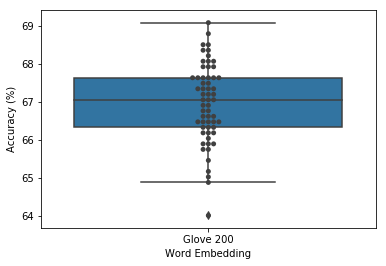

In [15]:
ax = sns.boxplot(y="Accuracy (%)", x=['Glove 200']*60, data=all_preds)
ax = sns.swarmplot(y="Accuracy (%)", x='Word Embedding', data=all_preds, color=".25")
ax.set

In [19]:
dir(ax)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_cachedRenderer',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_current_image',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_hold',
 '_init_axis',
 '_label',
 '_left_title',
 '_make_twin_axes',
 '_mouseover',
 '_navigate',
 '_navigate_mode',
 '_oid',
 '_on_unit

In [16]:
from collections import defaultdict, Counter

norm_score = lambda score: round(score * 100, 1)

root_folder = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
root_folder_join = lambda paths: os.path.join(root_folder, *paths)

target_dep_raw_data = root_folder_join(['Target Dependent Models', 'Target Dependent_raw_data'])
target_dep_plus_raw_data = root_folder_join(['Target Dependent Models', 'Target Dependent+ All_raw_data'])
tdparse_raw_data = root_folder_join(['results', 'TDParse Models','TDParse_raw_data'])
tdparse_plus_raw_data = root_folder_join(['results', 'TDParse Models','TDParsePlus_raw_data'])
lstm_raw_data = root_folder_join(['results', 'TDLstm', 'LSTM_raw_data'])
tdlstm_raw_data = root_folder_join(['results', 'TDLstm', 'TDLSTM_raw_data'])
tclstm_raw_data = root_folder_join(['results', 'TDLstm', 'TCLSTM_raw_data'])

model_raw_data = {'Target-Dep' : target_dep_raw_data, 'Target-Dep+' : target_dep_plus_raw_data,
                  'TDParse' : tdparse_raw_data, 'TDParse+' : tdparse_plus_raw_data,
                  'LSTM' : lstm_raw_data, 'TDLSTM' : tdlstm_raw_data, 'TCLSTM' : tclstm_raw_data}

dataset_names = []
dataset_f1 = {}
dataset_acc = {}

for dataset_name, train_test in dataset_train_test.items():
    train, test = train_test
    id_preds = defaultdict(list)
    for model, raw_data_folder in model_raw_data.items(): 
        raw_data_join = lambda file_name: os.path.join(raw_data_folder, file_name)
        raw_file_name = '{}.json'.format(dataset_name)
        preds = None
        ids = None
        with open(raw_data_join(raw_file_name), 'r') as raw_file:
            loaded_data = json.load(raw_file)
            ids = loaded_data['test_id']
            preds = loaded_data['y_pred']
        if model in ['LSTM', 'TDLSTM', 'TCLSTM']:
            mapper = {0:0, 1:1, 2:-1}
            pred_dif = []
            for value in preds:
                pred_dif.append(mapper[value])
            preds = pred_dif
        id_pred = {ids[index] : pred for index, pred in enumerate(preds)}
        for a_id, pred in id_pred.items():
            id_preds[a_id].append(pred)
    most_freq_class = lambda x: Counter(x).most_common(1)[0][0]
    id_most_freq_pred = {a_id : most_freq_class(pred) for a_id, pred in id_preds.items()}
    test.add_id_pred(id_most_freq_pred)
    test_y = test.sentiment_data()
    test_predictions = test.sentiment_data(sentiment_field='predicted')
    dataset_f1[dataset_name] = norm_score(f1_score(test_y, test_predictions, average='macro'))
    dataset_acc[dataset_name] = norm_score(accuracy_score(test_y, test_predictions))
 

In [17]:
dataset_f1

{'Dong Twitter': 68.799999999999997,
 'Election Twitter': 41.399999999999999,
 'SemEval 14 Laptop': 61.0,
 'SemEval 14 Restaurant': 61.200000000000003,
 'SemEval 16 Restaurant 14 All': 57.0,
 'SemEval 16 Restaurant 14 Train': 53.299999999999997,
 'SemEval 16 Restaurant 15&14': 55.600000000000001,
 'YouTuBean': 58.0}

In [18]:
dataset_acc

{'Dong Twitter': 71.400000000000006,
 'Election Twitter': 56.399999999999999,
 'SemEval 14 Laptop': 69.0,
 'SemEval 14 Restaurant': 76.5,
 'SemEval 16 Restaurant 14 All': 82.400000000000006,
 'SemEval 16 Restaurant 14 Train': 81.799999999999997,
 'SemEval 16 Restaurant 15&14': 82.900000000000006,
 'YouTuBean': 75.799999999999997}